# Classification and Regression
In this file, we will apply the concepts from the Classification and the regression files, and try to predict the Ammount by which a flight will be delayed in minutes only for those flights which we have predicted will be delayed.

#### Objectives
1. Read the Final Merged Data
2. Label Encode the columns which need label Encoding - ("Origin", "Dest")
3. Define the Variables X and Y and then split them into test and train respectively based on Classification and regression
4. Use the XGboost Classifier to Predict those flights that will be delayed
5. Filter out the flights which we will use for the XGboost Regressor to have only those flights that we have predicted will be delayed
6. Use XGboost regressor to predict the number of minutes by which the flights will be delayed.
7. Use standard metrics to evaluvate our performance

###### Classification and Regression Model Used
1. CLASSIFIER - XGboost Classifier : [LOOKUP](https://xgboost.readthedocs.io/en/latest/python/python_api.html)
2. REGRESSOR - XGboost Regressor [LOOKUP](https://xgboost.readthedocs.io/en/latest/python/python_api.html)

###### Classification and Regression Files
1. **Classification**- Predicting if the flight will be delayed or not [LINK](https://github.com/GV-9wj/Flight_Delay_Prediction/blob/master/Classification_Delayed_or_Not.ipynb)

2. **Regression**- Predicting the number of minutes by which a flight will be delayed [LINK](https://github.com/GV-9wj/Flight_Delay_Prediction/blob/master/Prediction_in_Minutes.ipynb)

In [1]:
# First let us import all the different libraries that we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Looking at the dataframe
Let us look at the dataframe for a little bit of insight into the data

In [2]:
# Readinbg the file 
df = pd.read_csv("Data/Merged_Flight_Weather.csv")
df.head()

,Unnamed: 0,index_x,ArrDel15,ArrDelayMinutes,ArrTime,CRSArrTime,CRSDepTime,DayofMonth,DepDel15,DepDelayMinutes,...,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,time,date,airport
0,0,0,0.0,8.0,1610.0,1602,745,1,0.0,0.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA
1,1,12608,1.0,33.0,1237.0,1204,820,1,0.0,1.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA
2,2,50768,0.0,0.0,1138.0,1143,759,1,0.0,0.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA
3,3,51023,0.0,10.0,1401.0,1351,738,1,0.0,2.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA
4,4,61167,0.0,0.0,1524.0,1527,745,1,0.0,0.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA


In [3]:
# We look at the colums first then the shape
df.columns

Index(['Unnamed: 0', 'index_x', 'ArrDel15', 'ArrDelayMinutes', 'ArrTime',
       'CRSArrTime', 'CRSDepTime', 'DayofMonth', 'DepDel15', 'DepDelayMinutes',
       'DepTime', 'Dest', 'DestAirportID', 'FlightDate', 'Month', 'Origin',
       'OriginAirportID', 'Quarter', 'Year', 'DeptTime', 'index_y',
       'windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM',
       'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph',
       'tempF', 'WindChillF', 'humidity', 'time', 'date', 'airport'],
      dtype='object')

In [4]:
# Now the shape of the dataframe
df.shape

(1851091, 36)

In [5]:
# Check for missing values
df.isna().sum()

Unnamed: 0         0
index_x            0
ArrDel15           0
ArrDelayMinutes    0
ArrTime            0
CRSArrTime         0
CRSDepTime         0
DayofMonth         0
DepDel15           0
DepDelayMinutes    0
DepTime            0
Dest               0
DestAirportID      0
FlightDate         0
Month              0
Origin             0
OriginAirportID    0
Quarter            0
Year               0
DeptTime           0
index_y            0
windspeedKmph      0
winddirDegree      0
weatherCode        0
precipMM           0
visibility         0
pressure           0
cloudcover         0
DewPointF          0
WindGustKmph       0
tempF              0
WindChillF         0
humidity           0
time               0
date               0
airport            0
dtype: int64

In [6]:
# Let us drop the columns that are unnecessary
df = df.drop(columns=['Unnamed: 0', 'index_x', 'time', 'date', 'FlightDate', 'index_y', 'DeptTime', 'airport'])

In [7]:
df.columns

Index(['ArrDel15', 'ArrDelayMinutes', 'ArrTime', 'CRSArrTime', 'CRSDepTime',
       'DayofMonth', 'DepDel15', 'DepDelayMinutes', 'DepTime', 'Dest',
       'DestAirportID', 'Month', 'Origin', 'OriginAirportID', 'Quarter',
       'Year', 'windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM',
       'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph',
       'tempF', 'WindChillF', 'humidity'],
      dtype='object')

In [8]:
df.shape

(1851091, 28)

In [9]:
df.duplicated().sum()

0

### Label Encoding using sklearn.LabelEncoder
Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.
Here we are label encoding the `Origin` and the `Dest` features, by first converting them to category type and then using `sklearn.preprocessing.LabelEncoder` : [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [10]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
df['Origin'] = label.fit_transform(df['Origin'])
df['Dest'] = label.fit_transform(df['Dest'])
df.dtypes

ArrDel15           float64
ArrDelayMinutes    float64
ArrTime            float64
CRSArrTime           int64
CRSDepTime           int64
DayofMonth           int64
DepDel15           float64
DepDelayMinutes    float64
DepTime            float64
Dest                 int32
DestAirportID        int64
Month                int64
Origin               int32
OriginAirportID      int64
Quarter              int64
Year                 int64
windspeedKmph        int64
winddirDegree        int64
weatherCode          int64
precipMM           float64
visibility           int64
pressure             int64
cloudcover           int64
DewPointF            int64
WindGustKmph         int64
tempF                int64
WindChillF           int64
humidity             int64
dtype: object

As you can see those both Origin and airport have been converted into category type

In [11]:
df.Origin.value_counts()

8     209321
14    166932
11    153438
0     146723
2     144149
7     132154
3     125904
13    115707
12    114012
4     100170
9      99568
6      93436
5      89551
1      83486
10     76540
Name: Origin, dtype: int64

In [12]:
df.Dest.value_counts()

8     210165
14    166526
11    153557
0     147719
2     142357
7     132378
3     125463
13    115822
12    113795
4     100437
9      99622
6      93441
5      89782
1      83405
10     76622
Name: Dest, dtype: int64

Another way for label encoding is to use `cat.codes` [LOOKUP](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

The code would look something like
```python
# To convert our variables to categories
df["Origin"] = df["Origin"].astype('category')
df["Dest"] = df["Dest"].astype('category')
# To see if our features have convered to category
df.dtypes
# Converting the categorical variables to labels
df["Origin"] = df["Origin"].cat.codes
df["Dest"] = df["Dest"].cat.codes
```


##### Feature exploration
Since there are no missing values or categorical variables we can continue further and look at the corellation between various features of the dataframe

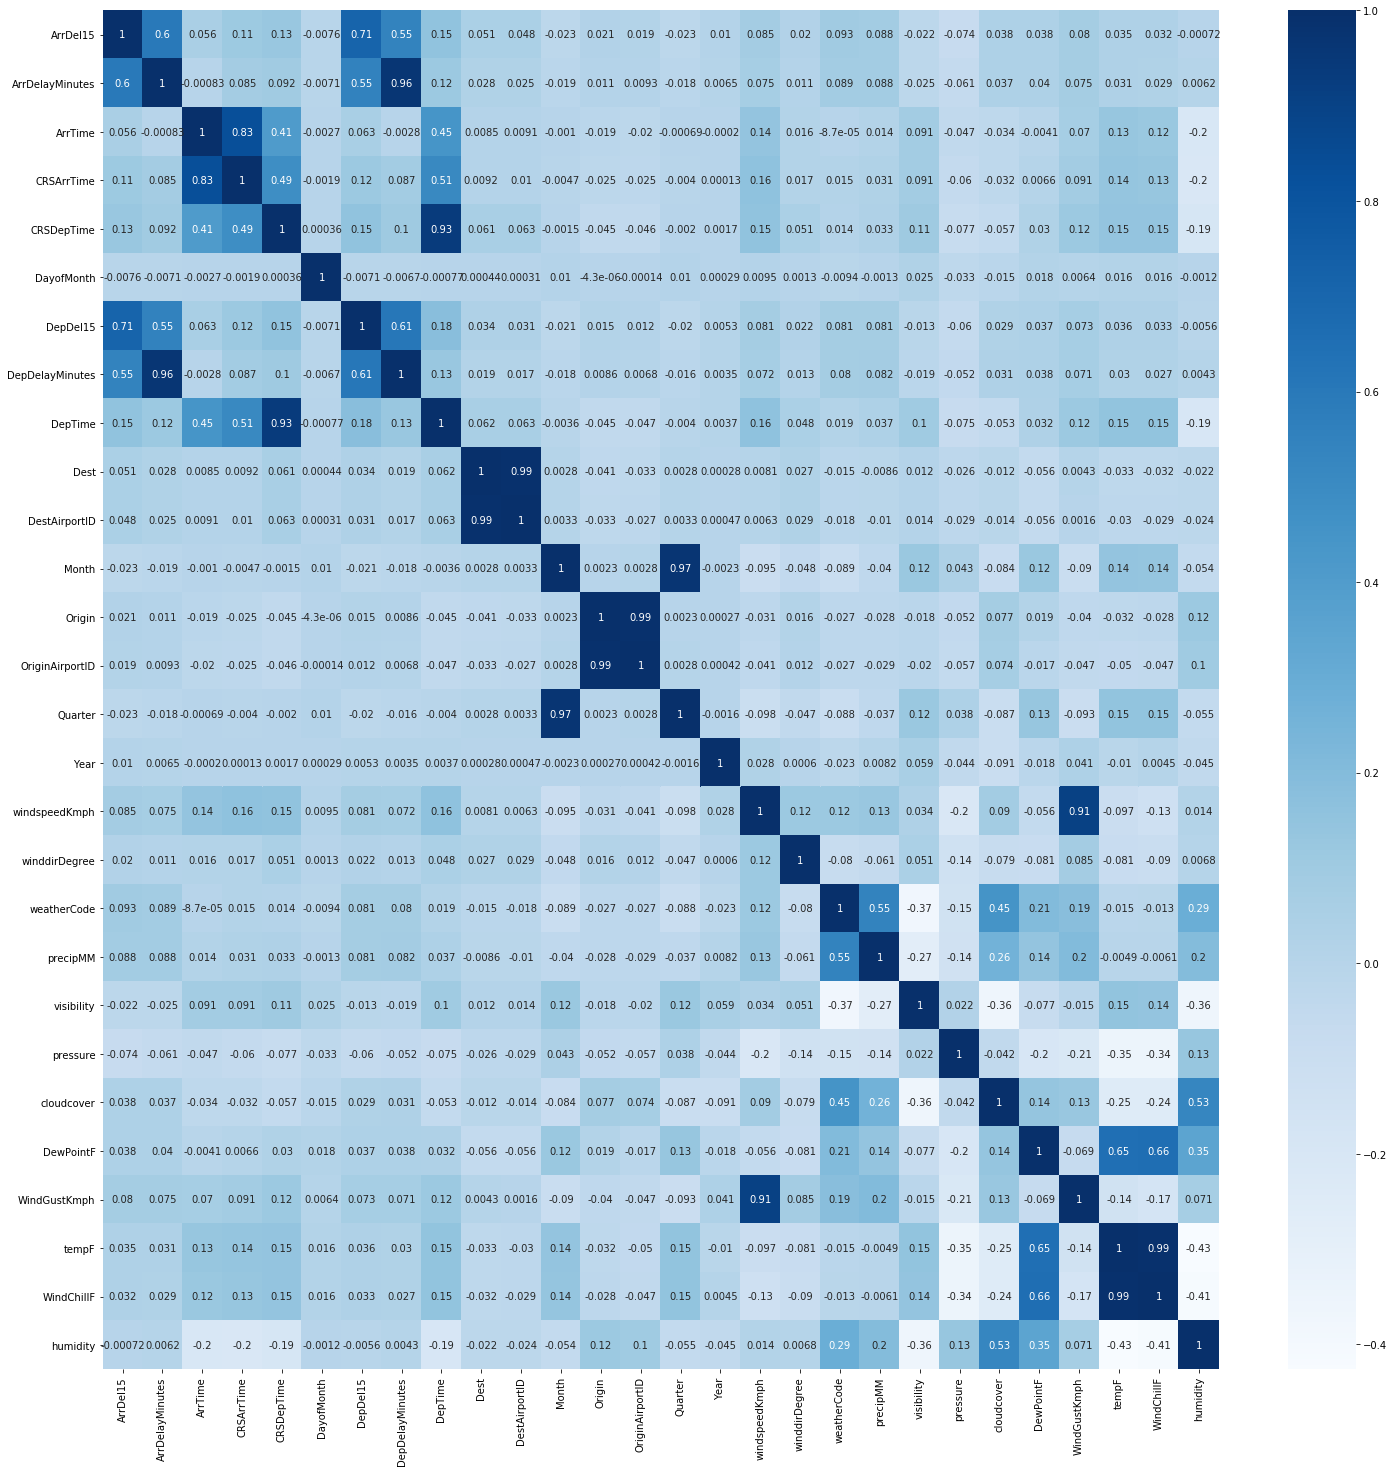

In [13]:
plt.figure(figsize=(25,25))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='Blues')
plt.show()

In [14]:
df.corr()

,ArrDel15,ArrDelayMinutes,ArrTime,CRSArrTime,CRSDepTime,DayofMonth,DepDel15,DepDelayMinutes,DepTime,Dest,...,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity
ArrDel15,1.000000,0.603637,0.055546,0.110609,0.127250,-0.007591,0.710541,0.546146,0.154332,0.051251,...,0.092634,0.088453,-0.021847,-0.073884,0.037856,0.038140,0.080305,0.035392,0.031994,-0.000722
ArrDelayMinutes,0.603637,1.000000,-0.000834,0.085111,0.092222,-0.007079,0.550232,0.964964,0.117292,0.027922,...,0.088526,0.088020,-0.024795,-0.061076,0.036748,0.040083,0.075440,0.031069,0.028560,0.006215
ArrTime,0.055546,-0.000834,1.000000,0.828556,0.408174,-0.002734,0.062766,-0.002793,0.445451,0.008549,...,-0.000087,0.014396,0.091251,-0.046967,-0.034024,-0.004150,0.070102,0.133441,0.122878,-0.203006
CRSArrTime,0.110609,0.085111,0.828556,1.000000,0.487283,-0.001900,0.118578,0.086948,0.513796,0.009236,...,0.015100,0.030531,0.091265,-0.060435,-0.032327,0.006616,0.090935,0.141935,0.132120,-0.204943
CRSDepTime,0.127250,0.092222,0.408174,0.487283,1.000000,0.000361,0.154995,0.104767,0.934012,0.061113,...,0.013539,0.032853,0.105887,-0.077360,-0.057290,0.030096,0.115162,0.146887,0.147579,-0.191060
DayofMonth,-0.007591,-0.007079,-0.002734,-0.001900,0.000361,1.000000,-0.007061,-0.006680,-0.000770,0.000438,...,-0.009418,-0.001258,0.025224,-0.032987,-0.015197,0.018075,0.006411,0.016333,0.015829,-0.001191
DepDel15,0.710541,0.550232,0.062766,0.118578,0.154995,-0.007061,1.000000,0.608083,0.183915,0.033677,...,0.080544,0.080526,-0.012641,-0.060214,0.029349,0.036909,0.072550,0.036080,0.033099,-0.005638
DepDelayMinutes,0.546146,0.964964,-0.002793,0.086948,0.104767,-0.006680,0.608083,1.000000,0.127724,0.019072,...,0.079583,0.081940,-0.019313,-0.052186,0.031329,0.038023,0.071244,0.029619,0.027398,0.004273
DepTime,0.154332,0.117292,0.445451,0.513796,0.934012,-0.000770,0.183915,0.127724,1.000000,0.061815,...,0.018801,0.036956,0.102771,-0.075017,-0.053261,0.031683,0.118261,0.150889,0.149697,-0.193536
Dest,0.051251,0.027922,0.008549,0.009236,0.061113,0.000438,0.033677,0.019072,0.061815,1.000000,...,-0.015492,-0.008630,0.011779,-0.025931,-0.011565,-0.056141,0.004309,-0.032825,-0.031778,-0.021596


## Defining the Dependent (Predictor) and the Independent Variables
Now for our predictor variable `y` we take the two columns necessary for Classification and Prediction which are namely : `'ArrDel15', 'ArrDelayMinutes'` And for `X` our Independent Variable which holds the features we will use for prediction wee will have to drop these variables, and also the ground truth Variable `ArrTime`. 

In [15]:
y = df[['ArrDel15', 'ArrDelayMinutes']]
X = df.drop(columns = ['ArrDel15', 'ArrDelayMinutes','ArrTime'])

In [16]:
# Now looking at the columns of the independent variable
X.columns

Index(['CRSArrTime', 'CRSDepTime', 'DayofMonth', 'DepDel15', 'DepDelayMinutes',
       'DepTime', 'Dest', 'DestAirportID', 'Month', 'Origin',
       'OriginAirportID', 'Quarter', 'Year', 'windspeedKmph', 'winddirDegree',
       'weatherCode', 'precipMM', 'visibility', 'pressure', 'cloudcover',
       'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity'],
      dtype='object')

In [17]:
y.columns

Index(['ArrDel15', 'ArrDelayMinutes'], dtype='object')

**NOTE** :

As you can see above the predictor variable `y` has two columns. We have not defined it with a single feature because then we need to perform the train-test split twice. Instead all we need to do now is copy the feature of interest from train and test data into a new variable which we will use in the classifier

In [18]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state = 123)

### Defining the variables for Classification

Let us  first look at the variables for **Classification**. We have seen that for Classification 
1. For the predictor variable the feature we need is `ArrDel15`, and
2. For the Independent variable we need all the features except for `ArrDel15` and `ArrDelayMinutes`.

For the predictor variables `y_train_classifier` and `y_test_classifier` all we need to do is use the column `ArrDel15` from `y_train` and `y_test` 

In [19]:
y_train_classification, y_test_classification = y_train["ArrDel15"], y_test["ArrDel15"]

In [20]:
# Let us look at the shape of our variables
X_train.shape,  y_train_classification.shape, X_test.shape, y_test_classification.shape

((1295763, 25), (1295763,), (555328, 25), (555328,))

 ### Classification
 Using the variables we will now use XGBoost Classifier and predict which of the flights will be delayed or not.

In [21]:
import xgboost
from xgboost import XGBClassifier
xgboost_model = XGBClassifier()
xbgoost_classifier = xgboost_model.fit(X_train, y_train_classification)

In [22]:
y_pred_xgboost = xgboost_model.predict(X_test)

In [23]:
import sklearn.metrics
print("XGBoost Clasifier Train Accuracy : {} %".format(xbgoost_classifier.score(X_train, y_train_classification)*100))
print("\nXGBoost Trees Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test_classification,
                                                                                             y_pred_xgboost)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test_classification,
                                                                                     y_pred_xgboost)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test_classification,y_pred_xgboost)))

XGBoost Clasifier Train Accuracy : 92.1412326173845 %

XGBoost Trees Clasifier Test Accuracy : 91.95592514694019 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    438975
         1.0       0.90      0.69      0.78    116353

    accuracy                           0.92    555328
   macro avg       0.91      0.84      0.87    555328
weighted avg       0.92      0.92      0.92    555328

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[429950   9025]
 [ 35646  80707]]


### Defining the variables for Regression

Now let us look at the variables for **Regression**. When we went about Regression we saw that :
1. For the predictor variable the feature in interest is `ArrDelayMinutes`
2. For the independent variable we use all the features except for `ArrDel15`, `ArrDelayMinutes` and `ArrTime`
3. For both the variables, we only used those datapoints where the **flight was delayed** which means wherever `df["ArrDel15"] == 1`


Therefore all we need to do is add the column `ArrDel15` from y to the X variables and copy the values of the dataframe whenever the flight is delayed. <br/>

In [24]:
# Adding the column from y to X
X_train["ArrDel15"] = y_train['ArrDel15'] 
X_train_regressor = X_train.loc[X_train["ArrDel15"] == 1]
X_train_regressor.drop("ArrDel15", axis = 1, inplace = True)

y_train_regressor = y_train['ArrDelayMinutes'][y_train["ArrDel15"] == 1]

y_test_regressor = y_test['ArrDelayMinutes']

X_train_regressor.shape, y_train_regressor.shape, X_test.shape, y_test_regressor.shape

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((271647, 25), (271647,), (555328, 25), (555328,))

#### How to use predicted flights for checking our model

Something notable that will help us filter out those flights that are delayed is that ***When we split it to test and train both X and y of test and train have the same index locations and also the shape.***  <br />  <br /> 
This means that : *X_train and y_train have the same index locations and the same shape, i.e they take up the same rows and the same thing works for X_test and y_test.*

Now when we predicted `y_pred_xgboost` using the classifier using `X_test` we got the results based on the rows(which carry an index) from `X_test` and now all we have to do is check whenever `y_pred_xgboost` is equal to 1 i.e whenever our model thought the flight was delayed, and then use those index locations to filter our our data.

In [25]:
list_for_feed = []
length = len(y_pred_xgboost)
for i in range(length):
    if y_pred_xgboost[i] == 1:
        list_for_feed.append(i)

In [26]:
X_test_regressor = X_test.iloc[list_for_feed]
y_test_regressor = y_test_regressor.iloc[list_for_feed]

In [27]:
X_train_regressor.shape, y_train_regressor.shape, X_test_regressor.shape, y_test_regressor.shape

((271647, 25), (271647,), (89732, 25), (89732,))

### Regression
We will onw use XGBoost's regression to predict the number of minutes by which it is delayed or not.

In [29]:
from xgboost import XGBRegressor
xgboost_regressor = XGBRegressor()
xgboost_regressor.fit(X_train_regressor,y_train_regressor)
y_pred_xgboost_regression = xgboost_regressor.predict(X_test_regressor)

In [30]:
import sklearn.metrics as metrics
mean_absolute_error=metrics.mean_absolute_error(y_test_regressor, y_pred_xgboost_regression) 
MSE=metrics.mean_squared_error(y_test_regressor, y_pred_xgboost_regression) 
RMSE= np.sqrt(MSE)
R2=metrics.r2_score(y_test_regressor, y_pred_xgboost_regression)
print("MAE: {}".format(mean_absolute_error))
print("MSE: {}".format(MSE))
print("RMSE: {}".format(RMSE))
print("R-Squared: {}".format(R2))

MAE: 12.99259263718914
MSE: 315.29144853167236
RMSE: 17.75644808320832
R-Squared: 0.9504640422018037
